In [362]:
import numpy as np
import pandas as pd

## https://datatable.readthedocs.io/en/latest/start/using-datatable.html
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest, f_regression, SelectFromModel

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, ridge_regression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import KBinsDiscretizer

#For Q-Q plot * BOXCOX & YEOJOHNSON Transformation
import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer, PowerTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
# We will try to use different categorical encoding techniques, multicolinearity, different regression techniques
# Also, we will look into OLS assumption
# Feature selection for better result


In [13]:
data = dt.fread('..\data\Price-of-Second-Hand-Car.csv').to_pandas()

In [14]:
data.shape

(4345, 9)

In [15]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [31]:
data.dtypes.value_counts()

object     5
float64    2
int32      2
dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int32  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int32  
 8   Model         4345 non-null   object 
dtypes: float64(2), int32(2), object(5)
memory usage: 271.7+ KB


In [65]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173.0,NaN,NaN,NaN,19418.746935,25584.24262,600.0,6999.0,11500.0,21700.0,300000.0
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345.0,NaN,NaN,NaN,161.237284,105.705797,0.0,86.0,155.0,230.0,980.0
EngineV,4195.0,NaN,NaN,NaN,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345.0,NaN,NaN,NaN,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.0
Model,4345,309,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Checking for nulls

data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [42]:
col_obj = data.select_dtypes(include = 'O').columns.tolist()
col_obj

['Brand', 'Body', 'Engine Type', 'Registration', 'Model']

In [43]:
col_num = data.select_dtypes(include='number').columns.tolist()
col_num

['Price', 'Mileage', 'EngineV', 'Year']

In [50]:
# Finding out cardinality of cateorical features

for col in col_obj:
    print(col,'-',data[col].nunique())
    print()
    print(data[col].unique())
    print()
    print(data[col].value_counts())
    print('\n')

Brand - 7

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64


Body - 6

['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']

sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64


Engine Type - 4

['Petrol' 'Diesel' 'Gas' 'Other']

Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64


Registration - 2

['yes' 'no']

yes    3947
no      398
Name: Registration, dtype: int64


Model - 309

['320' 'Sprinter 212' 'S 500' 'Q7' 'Rav 4' 'GLS 63' 'A6' 'Megane'
 'Golf IV' '19' 'A6 Allroad' 'Passat B6' 'Land Cruiser 100' 'Clio' '318'
 'Vito' 'Hilux' 'Polo' 'Outlander' 'A8' 'Touareg' 'Colt' 'GLS 500' '100'
 'Z4' 'Pajero Wagon' 'X5' 'Caddy' 'Camry' '528' 'TT' 'A4' 'G 55 AMG' 'X6'
 'G

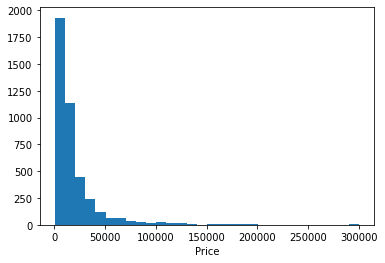

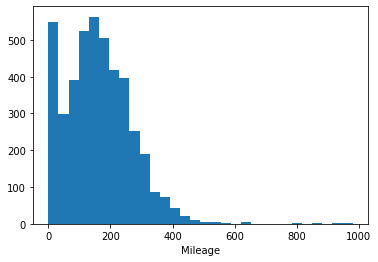

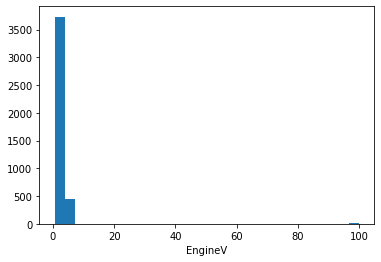

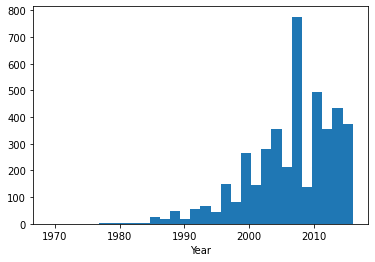

In [61]:
# looking at the distribution of numerical features
for col in col_num:
    
    plt.hist(data[col], bins = 30)
    plt.xlabel(col)
    plt.show()

In [62]:
data['EngineV'].nunique()

73

In [63]:
data['Year'].nunique()

39

In [67]:
# as we have 309 different brands of cars its better we drop this feature other wise we have to create 309 dummy variables

data.drop(labels=['Model'],axis = 1, inplace=True)

In [68]:
# Removing observations that have nulls

data.dropna(axis=0,  inplace=True)

In [69]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

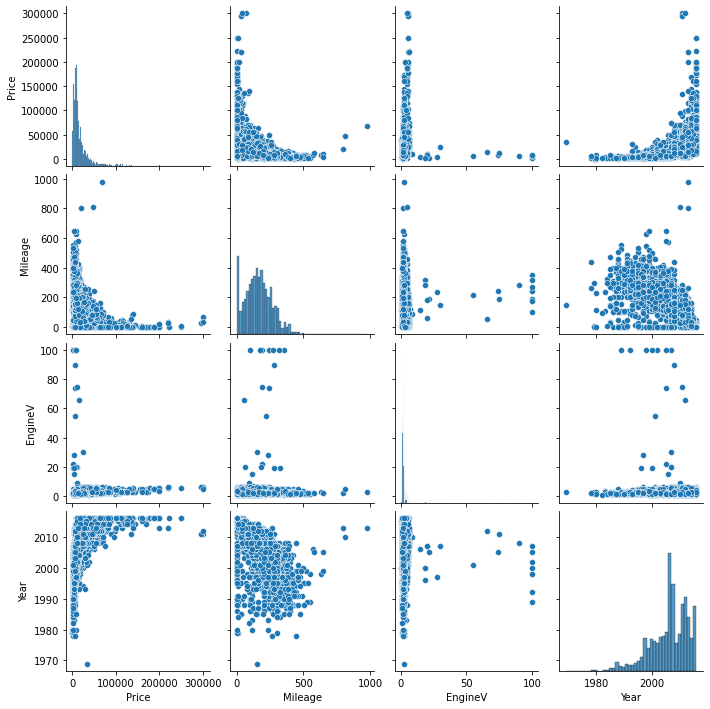

In [79]:
# Looking athe distribution of each of the features using seaborn


sns.pairplot(data = data, diag_kind="hist")

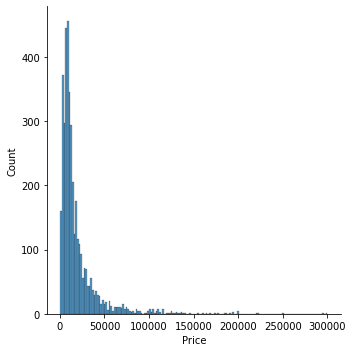

In [81]:
sns.displot(data['Price'],kind = 'hist')

In [83]:
data['Price'].describe()

count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

<AxesSubplot:>

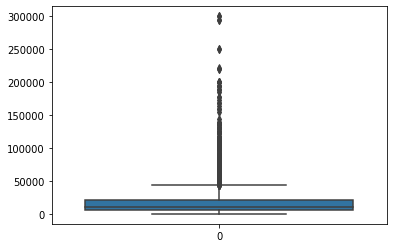

In [84]:
# We can see we have outliers as 75% of data has price less than 21900

sns.boxplot(data=data['Price'])

<AxesSubplot:xlabel='Brand', ylabel='Price'>

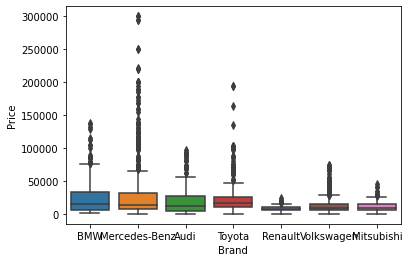

In [85]:
sns.boxplot(x = data['Brand'], y=data['Price'])

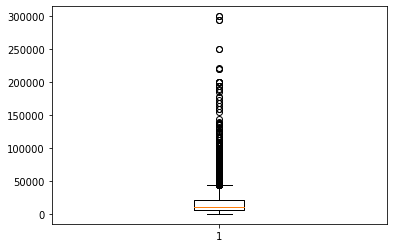

In [88]:
plt.boxplot(data['Price'])
plt.show()

In [92]:
# removing outliers & capping data to 99 percentile

q = data['Price'].quantile(0.99)
q

129812.51999999981

In [95]:
data = data[data['Price']<q]

In [97]:
data['Price'].describe()

# Now prices look much better

count      3984.000000
mean      17837.117460
std       18976.268315
min         600.000000
25%        6980.000000
50%       11400.000000
75%       21000.000000
max      129222.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Brand', ylabel='Price'>

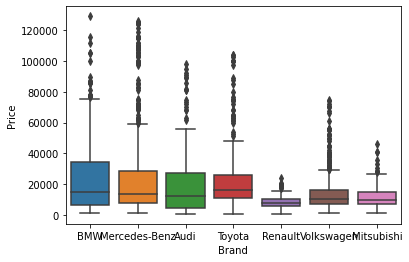

In [98]:
sns.boxplot(x = data['Brand'], y=data['Price'])

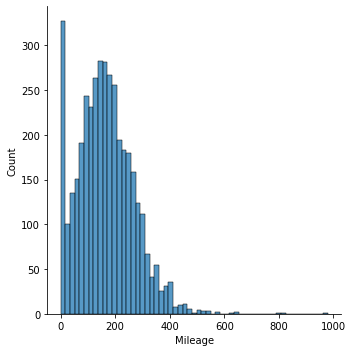

In [99]:
# We have outliers in mileage & EngineV
# We iwll get rid of outliers in the similar manner

sns.displot(data['Mileage'])

In [101]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]

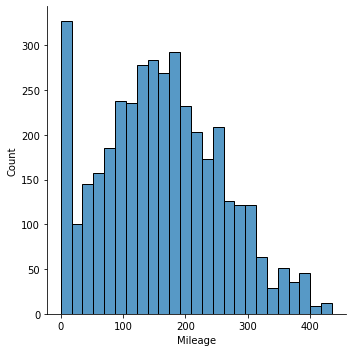

In [102]:

sns.displot(data['Mileage'])

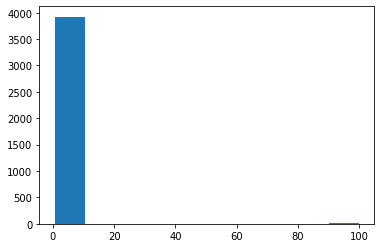

In [109]:
plt.hist(data['EngineV'])
plt.show()

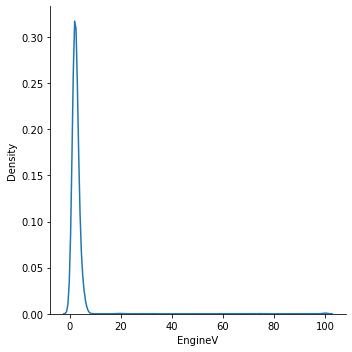

In [113]:
sns.displot(data['EngineV'], kind = 'kde')

In [115]:
from sklearn.preprocessing import KBinsDiscretizer

In [210]:
disc = KBinsDiscretizer(n_bins=5, encode='ordinal',strategy='uniform')


In [211]:
disc.fit(data[['EngineV']])

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [212]:
disc.bin_edges_

array([array([ 0.6  , 20.478, 40.356, 60.234, 80.112, 99.99 ])],
      dtype=object)

In [213]:
#mydata = disc.transform(data[['EngineV']])
disc.bin_edges_

array([array([ 0.6  , 20.478, 40.356, 60.234, 80.112, 99.99 ])],
      dtype=object)

In [238]:
bin_list = [ 0.6  , 20.478, 40.356, 60.234, 80.112, 99.99,100 ]

In [236]:
mydata = data.copy()

In [245]:
mydata['nbins'] = pd.cut(x = mydata['EngineV'], include_lowest=True,  bins = bin_list)

In [246]:
#mydata['bins']=disc.transform(data[['EngineV']])

In [247]:
mydata.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,nbins
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,"(0.599, 20.478]"
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,"(0.599, 20.478]"
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,"(0.599, 20.478]"
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,"(0.599, 20.478]"
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,"(0.599, 20.478]"


In [248]:
mydata.groupby('nbins')['EngineV'].count()

nbins
(0.599, 20.478]     3929
(20.478, 40.356]       3
(40.356, 60.234]       1
(60.234, 80.112]       3
(80.112, 99.99]        1
(99.99, 100.0]         7
Name: EngineV, dtype: int64

In [249]:
pd.DataFrame(mydata, columns=['Enginev']).value_counts()

Series([], dtype: int64)

In [133]:
mydata[mydata>10]

array([], dtype=float64)

In [142]:
# lets check how many values ofr EngineV are more than 6.5 
#  EngineV  should be less than 6.5

out_data = data[data['EngineV']>6.5]

In [143]:
out_data['EngineV'].describe()

count    22.000000
mean     56.778636
std      37.601889
min       7.200000
25%      20.000000
50%      60.500000
75%      99.990000
max      99.990000
Name: EngineV, dtype: float64

In [145]:
# Wrong entries in the data are
out_data['EngineV'].value_counts()

99.99    7
19.00    2
20.00    2
15.00    1
30.00    1
28.00    1
22.00    1
55.00    1
7.20     1
74.00    1
66.00    1
90.00    1
75.00    1
9.00     1
Name: EngineV, dtype: int64

In [250]:
data = data[data['EngineV']<6.5]

<AxesSubplot:ylabel='Frequency'>

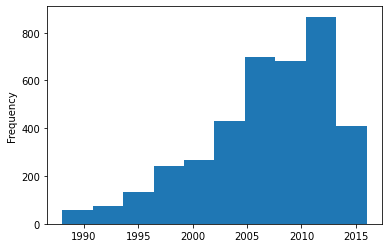

In [253]:
data['Year'].plot.hist()

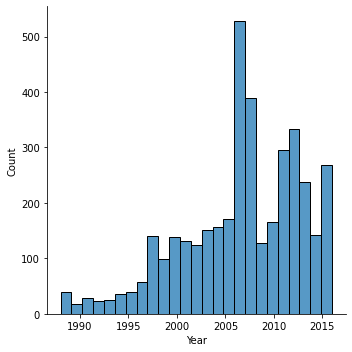

In [254]:
sns.displot(data['Year'])

In [251]:
# looking at the year columns

q = data['Year'].quantile(0.01)
data = data[data['Year']>q]
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


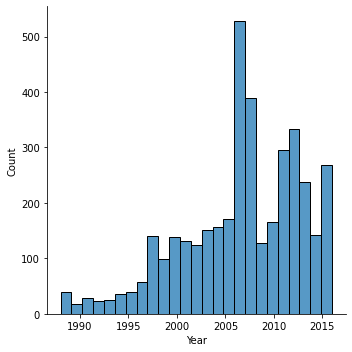

In [255]:
sns.displot(data['Year'])

In [257]:
data_c = data.reset_index(drop=True)

In [258]:
data_c.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [259]:
data_c.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [264]:
# Multicollinearity
# Regression
# Lasso
# Ridge 
data_c

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


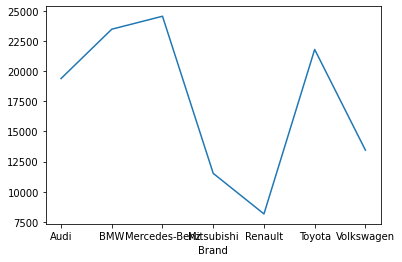

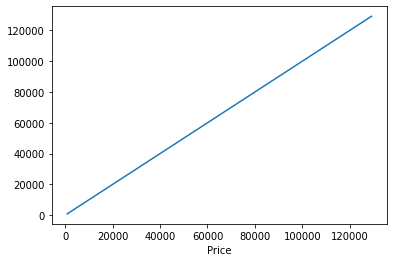

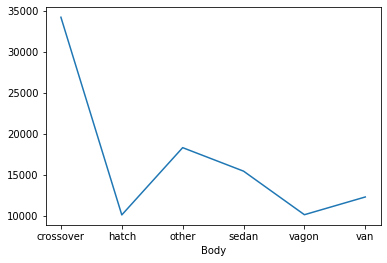

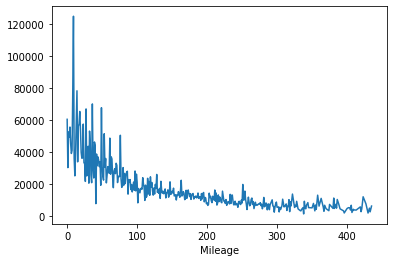

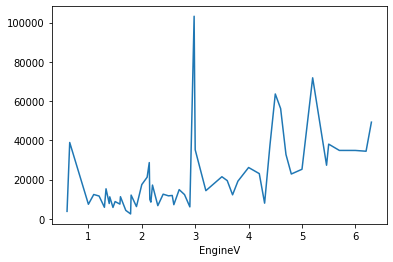

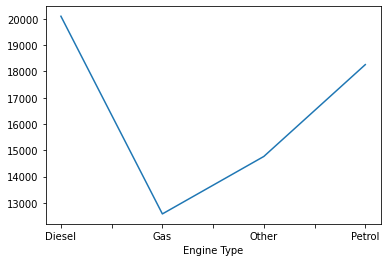

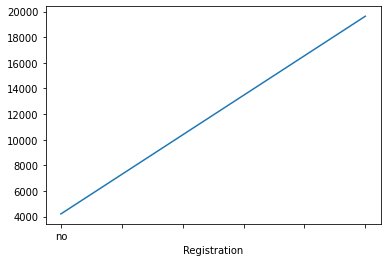

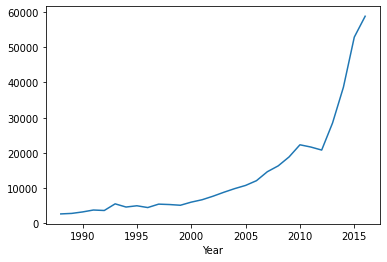

In [278]:
# Looking at the scatter plot between the price & other numeric variables
for col in data_c.columns:
    

    fig = plt.figure()
    fig = data_c.groupby([col])['Price'].mean().plot()
    plt.show()

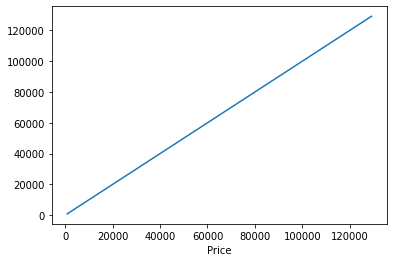

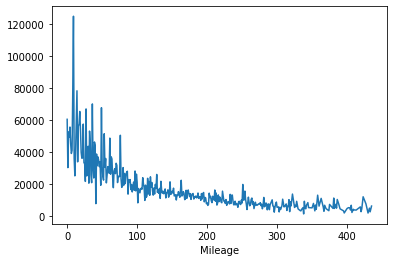

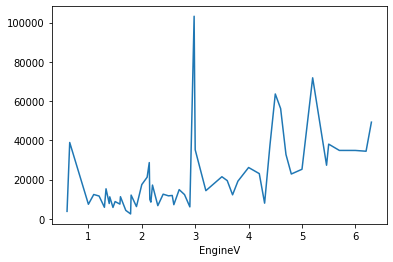

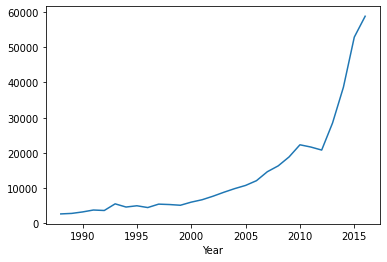

In [279]:
# Looking at the scatter plot between the price & other numeric variables
for col in data_c.select_dtypes(include = 'number').columns:
    

    fig = plt.figure()
    fig = data_c.groupby([col])['Price'].mean().plot()
    plt.show()

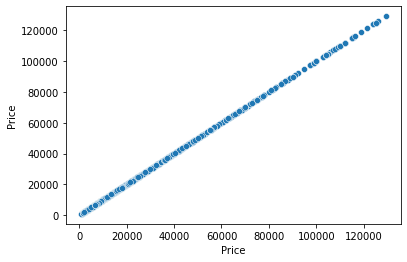

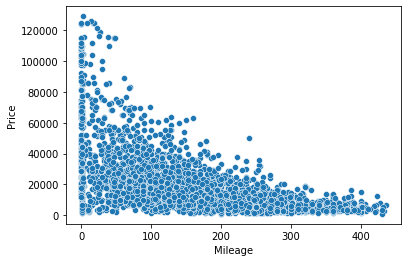

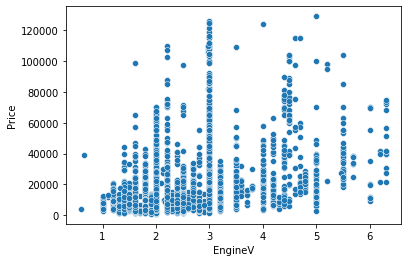

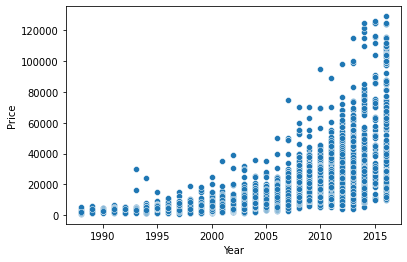

In [284]:
for col in data_c.select_dtypes(include = 'number').columns:
    
    sns.scatterplot(x = col, y='Price', data=data_c)
    plt.show()

<AxesSubplot:xlabel='Price', ylabel='Count'>

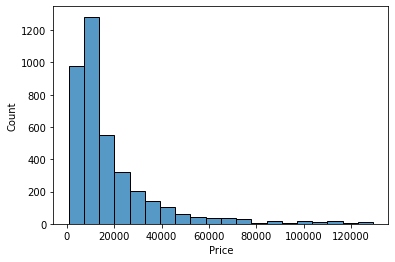

In [288]:
sns.histplot(data_c['Price'],bins = 20 )

In [290]:
#data.hist()

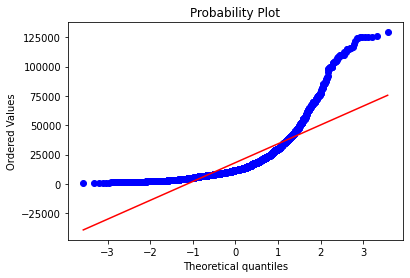

In [292]:
import scipy.stats as stats
stats.probplot(data_c['Price'], dist='norm',plot = plt)
plt.show()

In [293]:
# Logarithmic Transformation

data_c['Price_log'] = np.log(data_c['Price'])

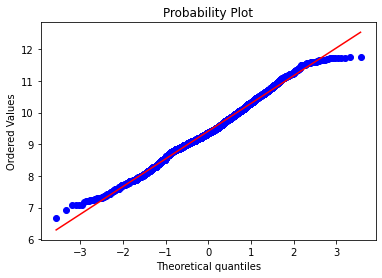

In [294]:
stats.probplot(data_c['Price_log'], dist='norm',plot = plt)
plt.show()

In [295]:
# Reciprocal Transformation

data_c['Price_reciprocal'] = np.reciprocal(data_c['Price'])

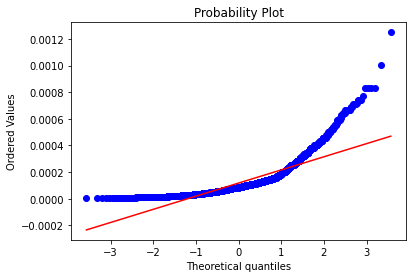

In [296]:
stats.probplot(data_c['Price_reciprocal'], dist='norm',plot = plt)
plt.show()

# Didn't get the desired result

In [297]:
# APplyting the square root transformation

In [300]:
# data_c['Price_Sqroot'] = data_c['Price']**(1/2)

data_c['Price_Sqroot'] = np.sqrt(data_c['Price'])

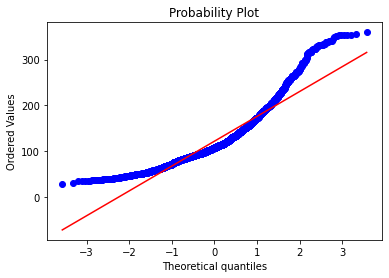

In [301]:
stats.probplot(data_c['Price_Sqroot'], dist='norm',plot = plt)
plt.show()

In [302]:
# Exponential Transformation

In [304]:
data_c['Price_expo'] = data_c['Price']**(1/1.5)

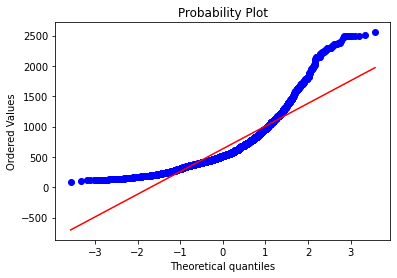

In [305]:
stats.probplot(data_c['Price_expo'], dist='norm',plot = plt)
plt.show()

In [306]:
# Box-Cox Transformation

In [307]:
data_c['Price_boxcox'], param = stats.boxcox(data_c['Price']) 

In [308]:
stats.boxcox(data_c['Price']) 

(array([6.82735814, 7.23793897, 7.56688482, ..., 8.88844829, 7.11254782,
        7.57618515]),
 -0.04977714935702495)

In [309]:
print('Optimal lambda: ', param)

Optimal lambda:  -0.04977714935702495


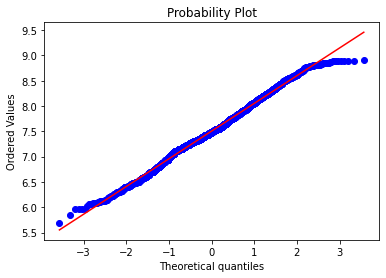

In [310]:
stats.probplot(data_c['Price_boxcox'], dist='norm',plot = plt)
plt.show()

In [311]:
# YeoJohnson Transformation

In [316]:
#(data_c['Price']).dtype
#to avaoid numpy errro
#data_c['Price']= data_c['Price'].astype('float')

dtype('float64')

In [314]:


data_c['Price_yeojohnson'], param = stats.yeojohnson(data_c['Price']) 
print('Optimal lambda: ', param)

Optimal lambda:  -0.049890980074227535


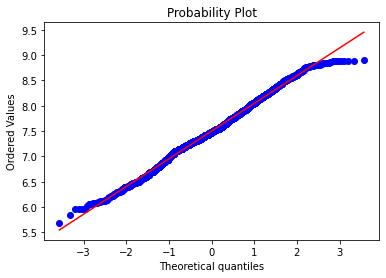

In [313]:
stats.probplot(data_c['Price_yeojohnson'], dist='norm',plot = plt)
plt.show()

## Using SKLEARN Transformations


### sklearn Log Transformation

In [319]:
# Creating a log transformaiton

transformer = FunctionTransformer(np.log, validate=True)

In [324]:
# Transforming all thenumerical &  positive  values

data_c['Price_log_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

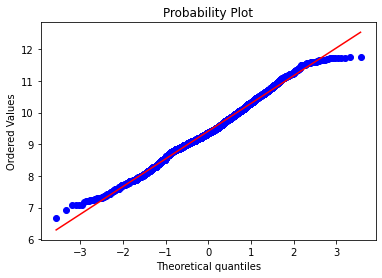

In [325]:
stats.probplot(data_c['Price_log_sk'], dist='norm',plot = plt)
plt.show()

### SKLEARN REciprocal Transformation

In [327]:
transformer = FunctionTransformer(lambda x:1/x, validate = True)

data_c['Price_reciprocal_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

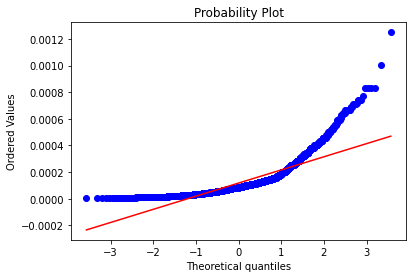

In [328]:
stats.probplot(data_c['Price_reciprocal_sk'], dist='norm',plot = plt)
plt.show()

### Sklearn Square Root Transformation

In [329]:
transformer = FunctionTransformer(lambda x:x**(1/2), validate = True)

data_c['Price_sqroot_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

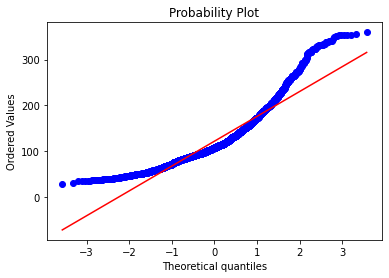

In [330]:
stats.probplot(data_c['Price_sqroot_sk'], dist='norm',plot = plt)
plt.show()

In [331]:
### Exponential Transormation

transformer = FunctionTransformer(lambda x:x**(1/1.22), validate = True)

data_c['Price_expo_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

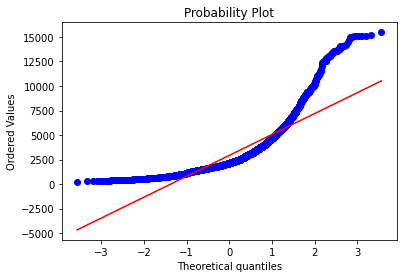

In [332]:
stats.probplot(data_c['Price_expo_sk'], dist='norm',plot = plt)
plt.show()

### Sklearn Box-Cox Transformation

In [337]:
transformer = PowerTransformer(method='box-cox', standardize=False)



In [339]:

transformer.fit(data_c['Price'].values.reshape(-1,1))

PowerTransformer(method='box-cox', standardize=False)

In [342]:
data_c['Price_boxcox_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

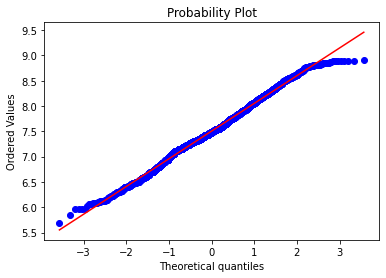

In [343]:
stats.probplot(data_c['Price_boxcox_sk'], dist='norm',plot = plt)
plt.show()

### Sklearn YeoJohnson

In [344]:
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
transformer.fit(data_c['Price'].values.reshape(-1,1))
data_c['Price_yeo_sk'] = transformer.transform(data_c['Price'].values.reshape(-1,1))

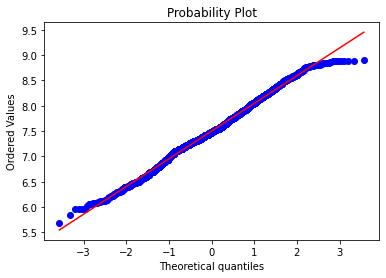

In [345]:
stats.probplot(data_c['Price_yeo_sk'], dist='norm',plot = plt)
plt.show()

In [346]:
data_t = data_c.copy() 

In [349]:
data_t.shape

(3867, 20)

In [351]:
data_t.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Price_log', 'Price_reciprocal', 'Price_Sqroot',
       'Price_expo', 'Price_boxcox', 'Price_yeojohnson', 'Price_log_sk',
       'Price_reciprocal_sk', 'Price_sqroot_sk', 'Price_expo_sk',
       'Price_boxcox_sk', 'Price_yeo_sk'],
      dtype='object')

In [353]:
data_t = data_t[['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Price_log_sk'
       ]]

In [354]:
data_t.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Price_log_sk
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


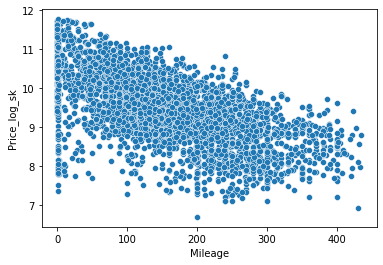

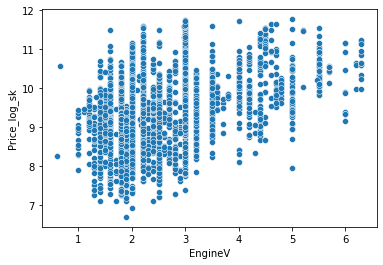

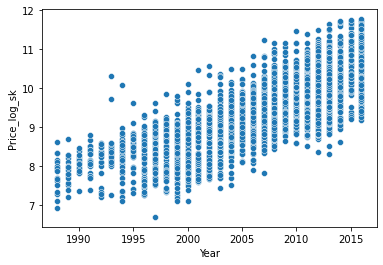

In [358]:
for col in data_t.select_dtypes(include = 'number').columns:
    if col not in ['Price','Price_log_sk']:
    
        sns.scatterplot(x = col, y='Price_log_sk', data=data_t)
        plt.show()

In [359]:
# Now plots fits much better now

In [360]:
# Lets drop the Price columns as we no longer need it.

data_t.drop(labels=['Price'],axis = 1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [361]:
data_t.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'Price_log_sk'],
      dtype='object')

### Multicollinearity

In [363]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_t[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF']= [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] =  variables.columns

In [364]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [ ]:
# VIF more than 10 is matter of concern so we will remove Year feautre form our model

data_t.drop(labels=['Year'],axis = 1, inplace=True)

In [367]:
data_t.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Price_log_sk'],
      dtype='object')